In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seb
import statistics

In [2]:
dataset = pd.read_csv("playstore_analysis.csv")

In [3]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.00000,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [4]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1. Data clean up – Missing value treatment

In [7]:
##a. Drop records where rating is missing since rating is our target/study variable
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

as we can see the number of missing value count in every coloumn ,rating has 1474 missing value and current ver has 8 and other missing value column too, we drop records where rating is missing as per our reqirement.

In [8]:
dataset1=dataset.dropna(subset=["Rating"])

In [9]:
dataset1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
#b. Check the null values for the Android Ver column
print(f"Missing value :\n{dataset1['Android Ver'].isnull().sum()}")

Missing value :
3


In [11]:
##i. Are all 3 records having the same problem?
print(dataset1[dataset1.isnull().any(axis=1)])  ##.any(axis=1) mean of all column in each row

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews         Size    Installs  Type     Price Content Rating  \
15         55   2700.00000      5,000+  Free         0       Everyone   
1553    20145     11.00000  1,000,000+  Free         0       Everyone   
4453      230  11000.00000      1,000+  Paid    $1.49        Everyone   
4490      189   2100.00000     10,000+  Free         0       Everyone   
6322     4

In [12]:
print(dataset1[dataset1.isnull().any(axis=1)])  ##.any(axis=1) mean of all column in each row

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews         Size    Installs  Type     Price Content Rating  \
15         55   2700.00000      5,000+  Free         0       Everyone   
1553    20145     11.00000  1,000,000+  Free         0       Everyone   
4453      230  11000.00000      1,000+  Paid    $1.49        Everyone   
4490      189   2100.00000     10,000+  Free         0       Everyone   
6322     4

In [13]:
print(dataset1[dataset1.isnull().any(axis=1)])  ##.any(axis=1) mean of all column in each row

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews         Size    Installs  Type     Price Content Rating  \
15         55   2700.00000      5,000+  Free         0       Everyone   
1553    20145     11.00000  1,000,000+  Free         0       Everyone   
4453      230  11000.00000      1,000+  Paid    $1.49        Everyone   
4490      189   2100.00000     10,000+  Free         0       Everyone   
6322     4

In [14]:
##ii. Drop the 3rd record i.e. record for “Life Made WIFI …” 
dataset2=dataset1.drop(10472)
verify=dataset2[dataset2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print(verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [15]:
print(dataset2[dataset2.isnull().any(axis=1)])

                                  App            Category  Rating Reviews  \
15    Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2      55   
1553             Market Update Helper  LIBRARIES_AND_DEMO     4.1   20145   
4453           [substratum] Vacuum: P     PERSONALIZATION     4.4     230   
4490             Pi Dark [substratum]     PERSONALIZATION     4.5     189   
6322           Virtual DJ Sound Mixer               TOOLS     4.2    4010   
7333                      Dots puzzle              FAMILY     4.0     179   

         Size    Installs  Type   Price Content Rating            Genres  \
15     2700.0      5,000+  Free       0       Everyone      Art & Design   
1553     11.0  1,000,000+  Free       0       Everyone  Libraries & Demo   
4453  11000.0      1,000+  Paid  $1.49        Everyone   Personalization   
4490   2100.0     10,000+  Free       0       Everyone   Personalization   
6322   8700.0    500,000+  Free       0       Everyone             Tools   
7333

successfully drop "Life Made WI-Fi Touchscreen Photo Frame" dataframe record and verify also that it successfully droped.

In [16]:
##iii. Replace remaining missing values with the mode
dataset2['Android Ver'].isna().sum()

2

In [17]:
dataset2['Android Ver'].fillna(dataset2['Android Ver'].mode()[0], inplace = True)

In [18]:
print(f"Missing value:{dataset2['Android Ver'].isna().sum()}")

Missing value:0


In [19]:
##c. Current ver – replace with most common value
dataset2['Current Ver'].fillna(dataset2['Current Ver'].mode()[0], inplace = True)

print(f"Missing Values :{dataset2['Current Ver'].isnull().sum()}")

Missing Values :0


# 2. Data clean up – correcting the data types

In [20]:
##a. Which all variables need to be brought to numeric types?
dataset2['Reviews'] = dataset2['Reviews'].astype(int)
dataset2['Size'] = dataset2['Size'].astype(int)

In [21]:
##b.Price variable – remove $ sign and convert to float
dataset2['Price'] = dataset2['Price'].str.replace('$', '')

<ipython-input-21-0dcd92ca12f5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataset2['Price'] = dataset2['Price'].str.replace('$', '')


In [22]:
dataset2.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


$ symbol successfully removed from Price colmnn.

In [23]:
dataset2['Price'] = dataset2['Price'].astype(float)

In [24]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 951.2+ KB


In [25]:
##c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

dataset2['Installs'] = dataset2['Installs'].str.replace('+','')

<ipython-input-25-5d3aeb9fa033>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataset2['Installs'] = dataset2['Installs'].str.replace('+','')


In [26]:
dataset2['Installs'] = dataset2['Installs'].str.replace(',', '')

In [27]:
dataset2['Installs'] = dataset2['Installs'].astype(int)

In [28]:
dataset2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [29]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 914.6+ KB


Successfully removed + and , sign from colmn Installs as well as change datatype integer.

# 3. Sanity checks – check for the following and handle accordingly

In [30]:
##a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
pd.unique(dataset2[['Rating']].values.ravel())
##.ravel()->return 1D array with all the input-array elements

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

##i. Are there any such records? Drop if so. Ans-> No such record has been oberved.

In [31]:
##b. Reviews should not be more than installs as only those who installed can review the app.

df = pd.DataFrame()
df = dataset2[dataset2.Reviews <= dataset2.Installs]
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# 4.dentify and handle outliers –

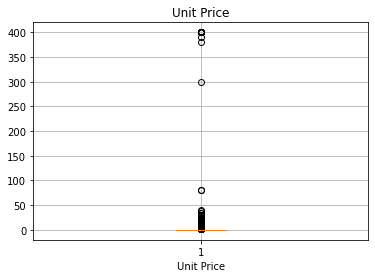

In [32]:
##i. Make suitable plot to identify outliers in price
plt.boxplot(dataset2.Price)
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [33]:
##ii. Do you expect apps on the play store to cost $200? Check out these cases
result_df = dataset2[dataset2['Price'] == 200]
print(result_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


in original dataframe there is a row of app $200 but if you see rating column is blank and priviously we drop data whose Rating value is null. Hence in new data frame we got Empty DataFrame.

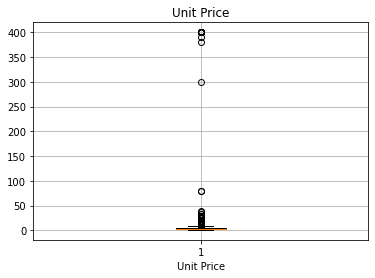

In [34]:
##iii. After dropping the useless records, make the suitable plot again to identify outliers 
##--> To fullfill above condtion let's remove whose price value is 0.
dataset2_1 = dataset2[dataset2['Price'] != 0]
plt.boxplot(dataset2_1.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [35]:
##iv. Limit data to records with price < $30
limit_data = dataset2[dataset2['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


Category
GAME                   1585419577
COMMUNICATION           815461799
SOCIAL                  621241091
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12881769
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585622
AUTO_AND_VEHICLES         1163630
LIBRA

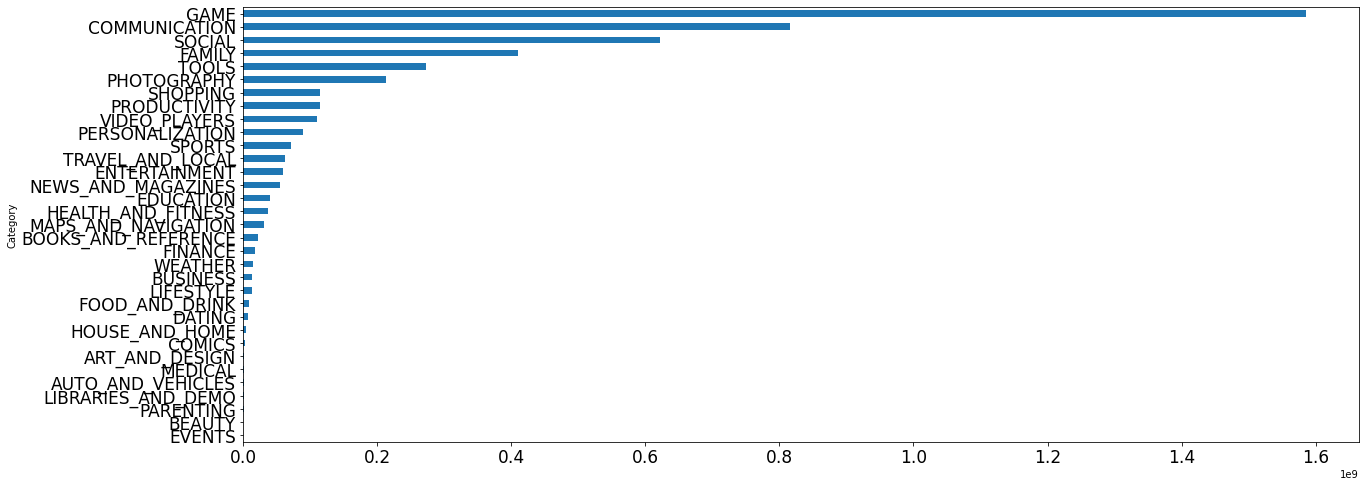

In [36]:
##b. Reviews column
##i. Make suitable plot
total=dataset2.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(20,8))
total.plot(kind='barh', fontsize=17)
print(total.sort_values(ascending=False))
plt.show()

In [37]:
##ii. Limit data to apps with < 1 Million review
limit_data_by_review = dataset2[dataset2['Reviews'] < 1000000]
limit_data_by_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [38]:
limit_data_by_review.shape

(8662, 13)

found 8655 rows of limited data to apps with < 1 Million reviews

In [39]:
##c. Installs
##i. What is the 95th percentile of the installs?

val = dataset2.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


In [40]:
##ii. Drop records having a value more than the 95th percentile
##checking
x = dataset2.Installs.quantile() > val
print (x)

False


There is no value more than the 95th percentile

# Data analysis to answer business questions

C:\Users\sai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


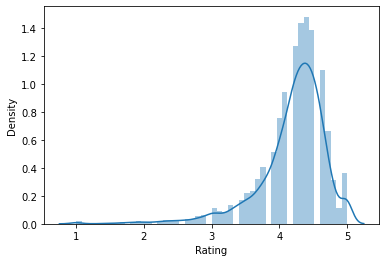

In [41]:
##5.What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
seb.distplot(dataset2['Rating'])

plt.show()

A left skewed distribution is a negatively skewed distribution because it’s long tail is on the negative direction on a number line.The mean is also on the left of the peak. Here you can see three measures position on the plot. So, you will find that: mean less than the mode median less than the mode mean less than median Here the distribution tells that most of the rating is in between 4 to 5.

##b. What is the implication of this on your analysis? -->Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model. Conclusion: If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

In [42]:
##6.What are the top Content Rating values?
dataset2['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

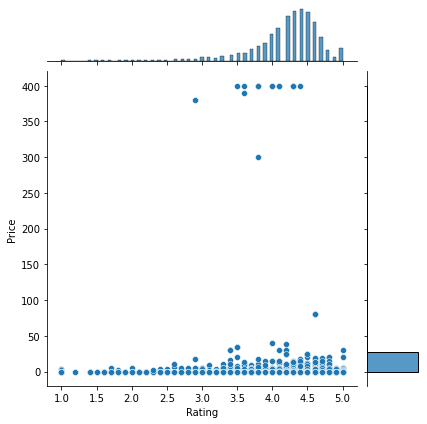

In [43]:
##7.Effect of price on rating
##a. Make a jointplot (with regression line)
seb.jointplot(x ="Rating" , y = "Price" ,data = dataset2)
plt.show()

##c. How do you explain the pattern? -->increasing the price as along with Rating Increases

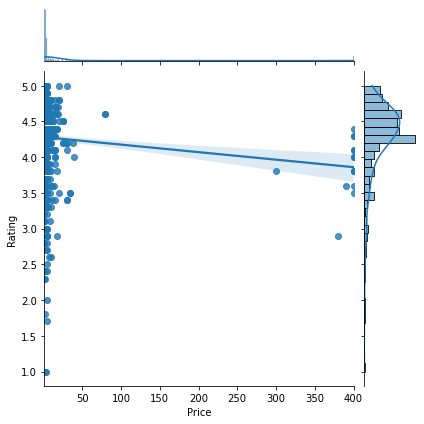

In [44]:
##d. Replot the data, this time with only records with price > 0
Price_greaterthan_zero = dataset2[dataset2['Price'] > 0]
seb.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

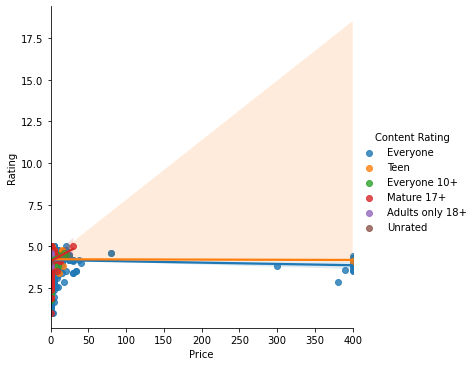

In [45]:
seb.lmplot(x='Price', y='Rating', hue ='Content Rating', data=dataset2)
plt.show()

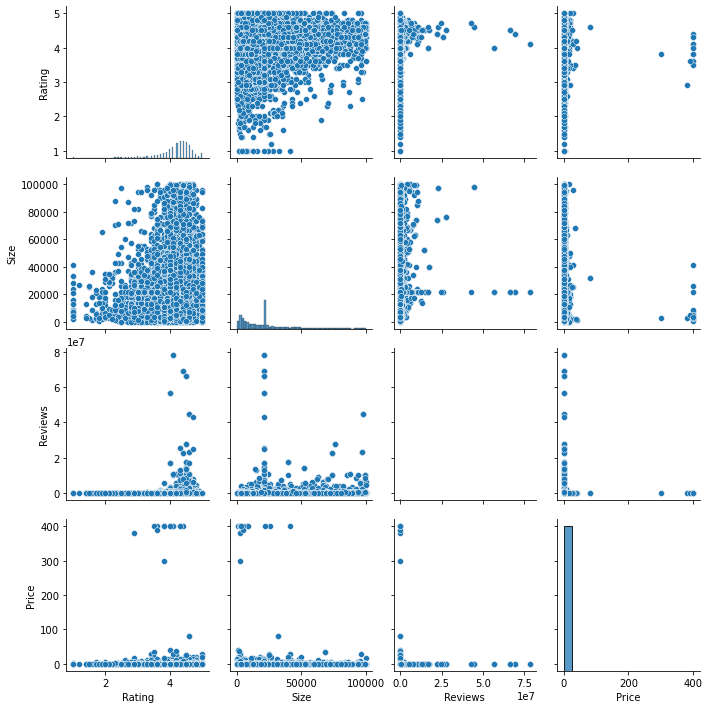

In [46]:
##8.Look at all the numeric interactions together – a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'
seb.pairplot(dataset2,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

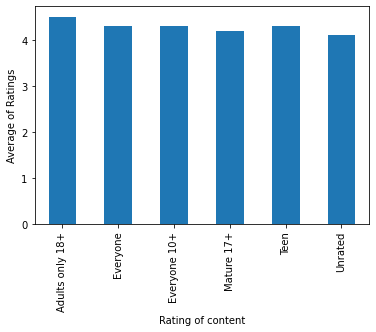

In [47]:
##10.Rating vs. content rating
##a. Make a bar plot displaying the rating for each content rating
a = dataset2['Rating'].groupby(dataset2['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

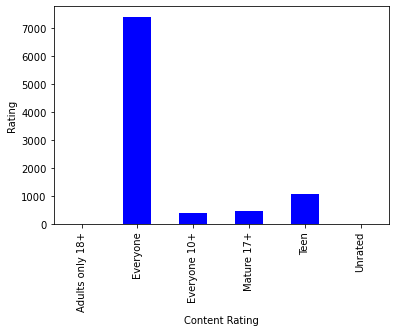

In [48]:
##c. Choose the right metric and plot
dataset2.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

C:\Users\sai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


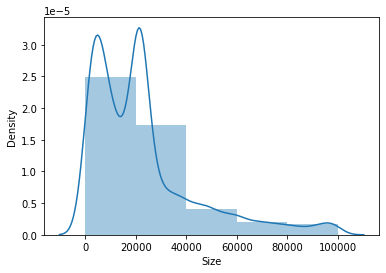

In [49]:
#11.Content rating vs. size vs. rating – 3 variables at a time
##a. Create 5 buckets (20% records in each) based on Size
seb.distplot(dataset2["Size"], bins=5)
plt.show()

In [50]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
dataset2['Size_Buckets'] = pd.cut(dataset2['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(dataset2, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Size_Buckets,,,,,,
VERY LOW,NaN,4.116056,4.188889,3.951429,4.232323,NaN
LOW,4.6,4.161853,4.207143,4.129592,4.209655,4.1
MED,3.8,4.243761,4.262602,4.091975,4.205630,NaN
HIGH,NaN,4.180212,4.209375,4.168333,4.213158,NaN
VERY HIGH,4.5,4.208134,4.287805,4.197170,4.279603,NaN


In [51]:
##b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
dataset2.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [52]:
dataset2.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [53]:
##c. Make a heatmap of this
##i. Annotated
##ii. Greens color mapii. Greens color map

Size_Buckets =pd.pivot_table(dataset2, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Size_Buckets,,,,,,
VERY LOW,NaN,3.8,3.84,3.28,3.90,NaN
LOW,4.6,3.8,3.94,3.64,3.88,4.1
MED,3.8,4.0,4.10,3.90,3.90,NaN
HIGH,NaN,3.9,4.00,3.90,4.00,NaN
VERY HIGH,4.5,3.9,4.10,4.00,4.00,NaN


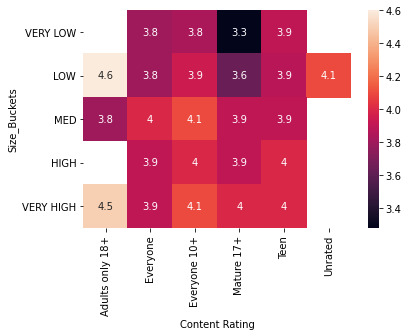

In [54]:
seb.heatmap(Size_Buckets, annot = True)
plt.show()

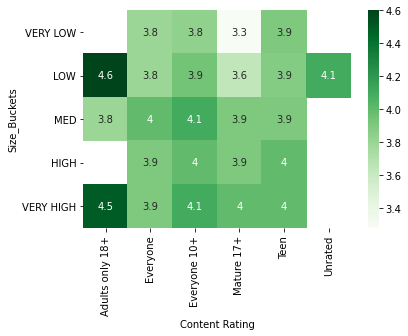

In [55]:
seb.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

##d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Yes, most of havier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it. Except, Mature 17+ where low size apps arent preferred to a greater variation.